In [30]:
import cv2
import numpy as np
from scipy import fftpack as fft
import matplotlib.pyplot as plt
%matplotlib inline

Input path from keyboard
Show image shape

In [31]:
path = input('Please Input Your PATH : ')
img = cv2.imread(path, 0)
print(img)
print(img.shape)

Please Input Your PATH : images/cameraman.tif
[[ 75  73  80 ...  32  32  32]
 [196 191 193 ... 217 220 215]
 [156 159 157 ... 221 220 219]
 ...
 [127 116 124 ... 132 125 120]
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]]
(256, 256)


Define 3 types of QM(i,j)

In [32]:

def selectQMatrix(qName):
    
    Q1 = np.array([[16, 11, 10, 16,  24,  40,  51,  61],
	[12, 12, 14, 19,  26,  58,  60,  55],
    [14, 13, 16, 24,  40,  57,  69,  56],
    [14, 17, 22, 29,  51,  87,  80,  62],
    [18, 22, 37, 56,  68, 109, 103,  77],
    [24, 35, 55, 64,  81, 104, 113,  92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103,  99]])

    Q2 = np.array([[16,   99,   85,   75,   60,   40,   24,   16],
   	[99,   85,   75,   60,   40,   24,   16,   16],
   	[85,   75,   60,   40,   24,   16,   16,   16],
   	[75,   60,   40,   24,   16,   16,   16,   16],
   	[60,   40,   24,   16,   16,   16,   16,   16],
   	[40,   24,   16,   16,   16,   16,   16,   16],
   	[24,   16,   16,   16,   16,   16,   16,   16],
   	[16,   16,   16,   16,   16,   16,   16,   16]])

    Q3 = np.array([50]*64).reshape(8,8)
    
    if qName == "Q1":
        return Q1
    elif qName == "Q2":
        return Q2
    elif qName == "Q3":
        return Q3
    else:
        return np.ones((8,8))

Read height,width

In [33]:
height  = len(img)
width = len(img[0])
sliced = [] 
block = 8
print("The image heigh is " +str(height)+", and image width is "+str(width)+" pixels")

The image heigh is 256, and image width is 256 pixels


Slice original image in 8x8 pixel
Store in sliced

In [34]:
currY = 0 
for i in range(block,height+1,block):
    currX = 0 
    for j in range(block,width+1,block):
        sliced.append((img[currY:i,currX:j]))
        currX = j
    currY = i
    
print("Size of the sliced image: "+str(len(sliced)))
print("Each elemend of sliced list contains a "+ str(sliced[0].shape)+ " element.")

Size of the sliced image: 1024
Each elemend of sliced list contains a (8, 8) element.


Show sliced

In [35]:
print(sliced)

[array([[ 75,  73,  80,  68,  32,  32,  32,  53],
       [196, 191, 193, 195, 195, 203, 198, 206],
       [156, 159, 157, 156, 158, 157, 155, 157],
       [156, 159, 158, 155, 158, 156, 159, 158],
       [160, 154, 157, 158, 157, 159, 158, 158],
       [156, 153, 155, 159, 159, 155, 156, 155],
       [155, 155, 155, 157, 156, 159, 152, 158],
       [156, 153, 157, 156, 153, 155, 154, 155]], dtype=uint8), array([[ 49,  50,  32,  32,  48,  48,  48,  49],
       [205, 208, 208, 207, 202, 209, 213, 216],
       [158, 157, 160, 160, 161, 158, 159, 158],
       [157, 158, 158, 159, 160, 160, 160, 158],
       [158, 160, 155, 156, 159, 158, 160, 157],
       [155, 157, 155, 154, 154, 158, 162, 157],
       [156, 158, 152, 153, 159, 156, 157, 161],
       [157, 156, 155, 156, 155, 157, 158, 160]], dtype=uint8), array([[ 48,  53,  49,  50,  48,  48,  48,  48],
       [212, 219, 221, 221, 220, 220, 215, 217],
       [159, 162, 160, 160, 163, 157, 158, 161],
       [163, 161, 162, 160, 164, 160, 

Set float type in imf

In [36]:
imf = [np.float32(img) for img in sliced]

DCT in imf 
Show first 8x8 block

In [37]:
DCToutput = []
for part in imf:
    currDCT = cv2.dct(part)
    #currDCT = img_dct = fft.dct( fft.dct(part.T, norm="ortho").T, norm="ortho" )
    DCToutput.append(currDCT)
DCToutput[0]

array([[ 1.19137500e+03,  1.13614607e+01,  4.37963724e+00,
        -9.44554710e+00,  4.12500000e+00,  1.79356635e+00,
         6.98033094e+00, -3.84635806e+00],
       [-8.85403290e+01,  1.80917473e+01,  8.88896370e+00,
        -1.33005781e+01,  6.02563858e-01,  7.40020037e-01,
         3.64006257e+00, -3.35163927e+00],
       [-1.14820328e+02,  1.96179562e+01,  5.77925253e+00,
        -1.39399223e+01,  2.16279292e+00,  2.86630678e+00,
         6.74003839e+00, -5.66732597e+00],
       [-1.29103729e+02,  1.81356640e+01,  2.67174196e+00,
        -1.01115313e+01,  4.29016781e+00,  4.81116962e+00,
         3.02474833e+00, -2.80654764e+00],
       [-1.40375000e+02,  1.95701561e+01,  5.10255957e+00,
        -1.08819389e+01, -1.12500000e+00,  4.56641197e+00,
         1.53952432e+00,  2.29849190e-01],
       [-1.35248169e+02,  1.70868778e+01,  1.05294859e+00,
        -9.45659637e+00, -1.21384740e+00, -2.28060365e+00,
        -1.11592507e+00, -1.12994874e+00],
       [-1.08980835e+02,  1.464750

First Quantization(Q1/1) หารทุกๆ block ด้วย (Q1/1)

In [38]:
QF=1
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
DCToutput

[array([[74.,  1.,  0., -1.,  0.,  0.,  0., -0.],
        [-7.,  2.,  1., -1.,  0.,  0.,  0., -0.],
        [-8.,  2.,  0., -1.,  0.,  0.,  0., -0.],
        [-9.,  1.,  0., -0.,  0.,  0.,  0., -0.],
        [-8.,  1.,  0., -0., -0.,  0.,  0.,  0.],
        [-6.,  0.,  0., -0., -0., -0., -0., -0.],
        [-2.,  0., -0., -0.,  0.,  0., -0.,  0.],
        [-1.,  0.,  0., -0.,  0., -0.,  0., -0.]], dtype=float32),
 array([[ 75.,  -1.,   1.,   0.,  -0.,  -0.,  -0.,  -0.],
        [ -8.,  -0.,   0.,   0.,  -0.,  -0.,  -0.,   0.],
        [ -9.,  -0.,   1.,   0.,   0.,  -0.,  -0.,  -0.],
        [-11.,  -0.,   0.,   0.,  -0.,  -0.,  -0.,   0.],
        [ -9.,   0.,   0.,   0.,   0.,  -0.,  -0.,   0.],
        [ -7.,   0.,  -0.,   0.,   0.,  -0.,  -0.,   0.],
        [ -3.,   0.,  -0.,   0.,  -0.,   0.,  -0.,   0.],
        [ -1.,   0.,  -0.,   0.,   0.,  -0.,  -0.,   0.]], dtype=float32),
 array([[ 77.,  -0.,  -0.,  -0.,   0.,  -0.,  -0.,   0.],
        [ -7.,   0.,  -0.,  -0.,  -0.,  -0.,

First Dequantization(Q1/1) คูณทุกๆ block ด้วย (Q1/1) 

In [39]:
QF=1
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
DCToutput

[array([[1184.,   11.,    0.,  -16.,    0.,    0.,    0.,   -0.],
        [ -84.,   24.,   14.,  -19.,    0.,    0.,    0.,   -0.],
        [-112.,   26.,    0.,  -24.,    0.,    0.,    0.,   -0.],
        [-126.,   17.,    0.,   -0.,    0.,    0.,    0.,   -0.],
        [-144.,   22.,    0.,   -0.,   -0.,    0.,    0.,    0.],
        [-144.,    0.,    0.,   -0.,   -0.,   -0.,   -0.,   -0.],
        [ -98.,    0.,   -0.,   -0.,    0.,    0.,   -0.,    0.],
        [ -72.,    0.,    0.,   -0.,    0.,   -0.,    0.,   -0.]],
       dtype=float32),
 array([[1200.,  -11.,   10.,    0.,   -0.,   -0.,   -0.,   -0.],
        [ -96.,   -0.,    0.,    0.,   -0.,   -0.,   -0.,    0.],
        [-126.,   -0.,   16.,    0.,    0.,   -0.,   -0.,   -0.],
        [-154.,   -0.,    0.,    0.,   -0.,   -0.,   -0.,    0.],
        [-162.,    0.,    0.,    0.,    0.,   -0.,   -0.,    0.],
        [-168.,    0.,   -0.,    0.,    0.,   -0.,   -0.,    0.],
        [-147.,    0.,   -0.,    0.,   -0.,    0.,  

IDCT ทุกๆ block

In [40]:
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]

array([68.5548  , 76.899475, 78.64523 , 63.58387 , 40.81104 , 29.46526 ,
       36.46565 , 48.5259  ], dtype=float32)

 Combine all 8x8 blocks in 1 image

In [41]:
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res1_1 = np.vstack((rowNcol))
print(res1_1)

[[ 68.5548    76.899475  78.64523  ...  31.965988  31.965988  31.965988]
 [198.22142  205.25931  208.86395  ... 214.6648   214.6648   214.6648  ]
 [149.61232  152.6019   155.05847  ... 223.22467  223.22467  223.22467 ]
 ...
 [118.52809  134.93779  122.83599  ... 134.66393  126.93167  112.17236 ]
 [113.02671  112.97125  115.52228  ... 146.27824  133.01602  112.33155 ]
 [131.44646  118.95802  133.4174   ... 135.46661  128.42526  112.860756]]


Quantization(Q1/4) หารทุกๆ block ด้วย (Q1/4)
ทําเหมือน (Q1/1) ขั้นตอน

In [42]:
#######Quantization######
QF=4
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput Show output


#######Dequantization######
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput Show output


#######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


####### Combine all blocks ######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res1_2 = np.vstack((rowNcol))


######Show Image######
print(res1_2)


[[ 68.5548    76.899475  78.64523  ...  31.965988  31.965988  31.965988]
 [198.22142  205.25931  208.86395  ... 214.6648   214.6648   214.6648  ]
 [149.61232  152.6019   155.05847  ... 223.22467  223.22467  223.22467 ]
 ...
 [118.52809  134.93779  122.83599  ... 134.66393  126.93167  112.17236 ]
 [113.02671  112.97125  115.52228  ... 146.27824  133.01602  112.33155 ]
 [131.44646  118.95802  133.4174   ... 135.46661  128.42526  112.860756]]


Quantization(Q1/8) หารทุกๆ block ด้วย (Q1/8)
ทําเหมือน (Q1/1) ขั้นตอน

In [43]:
#######Quantization######
QF=8
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


#######Dequantization######
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


#######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


####### Combine all blocks ######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res1_3 = np.vstack((rowNcol))


######Show Image######
print(res1_3)

[[ 68.5548    76.899475  78.64523  ...  31.965988  31.965988  31.965988]
 [198.22142  205.25931  208.86395  ... 214.6648   214.6648   214.6648  ]
 [149.61232  152.6019   155.05847  ... 223.22467  223.22467  223.22467 ]
 ...
 [118.52809  134.93779  122.83599  ... 134.66393  126.93167  112.17236 ]
 [113.02671  112.97125  115.52228  ... 146.27824  133.01602  112.33155 ]
 [131.44646  118.95802  133.4174   ... 135.46661  128.42526  112.860756]]


Quantization(Q1/12) หารทุกๆ block ด้วย (Q1/12)
ทําเหมือน (Q1/1) ขั้นตอน

In [44]:
######Quantization######
QF=12
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q1")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res1_4 = np.vstack((rowNcol))


######Show Image######
print(res1_4)

[[ 68.5548    76.899475  78.64523  ...  31.965988  31.965988  31.965988]
 [198.22142  205.25931  208.86395  ... 214.6648   214.6648   214.6648  ]
 [149.61232  152.6019   155.05847  ... 223.22467  223.22467  223.22467 ]
 ...
 [118.52809  134.93779  122.83599  ... 134.66393  126.93167  112.17236 ]
 [113.02671  112.97125  115.52228  ... 146.27824  133.01602  112.33155 ]
 [131.44646  118.95802  133.4174   ... 135.46661  128.42526  112.860756]]


Quantization(Q2/1) หารทุกๆ block ด้วย (Q2/1)
ทําเหมือน (Q1/1) ขั้นตอน

In [45]:
######Quantization######
QF=1
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res2_1 = np.vstack((rowNcol))


######Show Image######
print(res2_1)

[[ 54.743446  63.171806  68.47979  ...  44.202957  44.202957  44.202957]
 [187.45947  192.44376  197.40138  ... 215.83942  215.83942  215.83942 ]
 [150.67717  147.80452  146.74869  ... 221.15355  221.15355  221.15355 ]
 ...
 [131.69785  154.47244  138.0242   ... 129.74947  132.40208  124.91117 ]
 [112.36213  124.892975 130.46822  ... 152.34776  148.29494  130.50792 ]
 [105.116394 111.947655 138.49814  ... 144.99948  147.54108  132.51213 ]]


Quantization(Q2/4) หารทุกๆ block ด้วย (Q2/4)
ทําเหมือน (Q1/1) ขั้นตอน

In [46]:
######Quantization######
QF=4
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res2_2 = np.vstack((rowNcol))


######Show Image######
print(res2_2)

[[ 54.743446  63.171806  68.47979  ...  44.202957  44.202957  44.202957]
 [187.45947  192.44376  197.40138  ... 215.83942  215.83942  215.83942 ]
 [150.67717  147.80452  146.74869  ... 221.15355  221.15355  221.15355 ]
 ...
 [131.69785  154.47244  138.0242   ... 129.74947  132.40208  124.91117 ]
 [112.36213  124.892975 130.46822  ... 152.34776  148.29494  130.50792 ]
 [105.116394 111.947655 138.49814  ... 144.99948  147.54108  132.51213 ]]


Quantization(Q2/8) หารทุกๆ block ด้วย (Q2/8)
ทําเหมือน (Q1/1) ขั้นตอน

In [47]:
######Quantization######
QF=8
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res2_3 = np.vstack((rowNcol))


######Show Image######
(res2_3)

array([[ 54.743446,  63.171806,  68.47979 , ...,  44.202957,  44.202957,
         44.202957],
       [187.45947 , 192.44376 , 197.40138 , ..., 215.83942 , 215.83942 ,
        215.83942 ],
       [150.67717 , 147.80452 , 146.74869 , ..., 221.15355 , 221.15355 ,
        221.15355 ],
       ...,
       [131.69785 , 154.47244 , 138.0242  , ..., 129.74947 , 132.40208 ,
        124.91117 ],
       [112.36213 , 124.892975, 130.46822 , ..., 152.34776 , 148.29494 ,
        130.50792 ],
       [105.116394, 111.947655, 138.49814 , ..., 144.99948 , 147.54108 ,
        132.51213 ]], dtype=float32)

Quantization(Q2/12) หารทุกๆ block ด้วย (Q2/12)
ทําเหมือน (Q1/1) ขั้นตอน

In [48]:
######Quantization######
QF=12
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q2")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res2_4 = np.vstack((rowNcol))


######Show Image######
print(res2_4)

[[ 54.743446  63.171806  68.47979  ...  44.202957  44.202957  44.202957]
 [187.45947  192.44376  197.40138  ... 215.83942  215.83942  215.83942 ]
 [150.67717  147.80452  146.74869  ... 221.15355  221.15355  221.15355 ]
 ...
 [131.69785  154.47244  138.0242   ... 129.74947  132.40208  124.91117 ]
 [112.36213  124.892975 130.46822  ... 152.34776  148.29494  130.50792 ]
 [105.116394 111.947655 138.49814  ... 144.99948  147.54108  132.51213 ]]


Quantization(Q3/1) หารทุกๆ block ด้วย (Q3/1)
ทําเหมือน (Q1/1) ขั้นตอน

In [49]:
######Quantization######
QF=1
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res3_1 = np.vstack((rowNcol))


######Show Image######
print(res3_1)

[[ 57.627987  68.16342   74.798386 ...  52.9908    52.9908    52.9908  ]
 [180.81297  187.04333  193.24037  ... 218.42307  218.42307  218.42307 ]
 [151.90475  148.31393  146.99417  ... 218.9843   218.9843   218.9843  ]
 ...
 [145.8242   157.17291  134.50131  ... 124.86133  135.07007  134.08478 ]
 [116.58358  130.53783  133.42131  ... 157.80354  154.88168  134.91267 ]
 [ 96.425446 117.68823  148.14597  ... 163.0449   159.54648  133.1731  ]]


Quantization(Q3/4) หารทุกๆ block ด้วย (Q3/4)
ทําเหมือน (Q1/1) ขั้นตอน

In [50]:
######Quantization######
QF=4
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res3_2 = np.vstack((rowNcol))


######Show Image######
print(res3_2)

[[ 57.627987  68.16342   74.798386 ...  52.9908    52.9908    52.9908  ]
 [180.81297  187.04333  193.24037  ... 218.42307  218.42307  218.42307 ]
 [151.90475  148.31393  146.99417  ... 218.9843   218.9843   218.9843  ]
 ...
 [145.8242   157.17291  134.50131  ... 124.86133  135.07007  134.08478 ]
 [116.58358  130.53783  133.42131  ... 157.80354  154.88168  134.91267 ]
 [ 96.425446 117.68823  148.14597  ... 163.0449   159.54648  133.1731  ]]


Quantization(Q3/8) หารทุกๆ block ด้วย (Q3/8)
ทําเหมือน (Q1/1) ขั้นตอน

In [51]:
######Quantization######
QF=8
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res3_3 = np.vstack((rowNcol))


######Show Image######
print(res3_3)

[[ 57.627987  68.16342   74.798386 ...  52.9908    52.9908    52.9908  ]
 [180.81297  187.04333  193.24037  ... 218.42307  218.42307  218.42307 ]
 [151.90475  148.31393  146.99417  ... 218.9843   218.9843   218.9843  ]
 ...
 [145.8242   157.17291  134.50131  ... 124.86133  135.07007  134.08478 ]
 [116.58358  130.53783  133.42131  ... 157.80354  154.88168  134.91267 ]
 [ 96.425446 117.68823  148.14597  ... 163.0449   159.54648  133.1731  ]]


Quantization(Q3/12) หารทุกๆ block ด้วย (Q3/12)
ทําเหมือน (Q1/1) ขั้นตอน

In [52]:
######Quantization######
QF=12
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]/selectedQMatrix[i,j])
#DCToutput


######Dequantization######
selectedQMatrix = (selectQMatrix("Q3")/QF)
for ndct in DCToutput:
    for i in range(block):
        for j in range(block):
            ndct[i,j] = np.around(ndct[i,j]*selectedQMatrix[i,j])
#DCToutput


######IDCT######
invList = []
for ipart in DCToutput:
    ipart
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]


######Combine all blocks######
row = 0
rowNcol = []
for j in range(int(width/block),len(invList)+1,int(width/block)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res3_4 = np.vstack((rowNcol))


######Show Image######
print(res3_4)

[[ 57.627987  68.16342   74.798386 ...  52.9908    52.9908    52.9908  ]
 [180.81297  187.04333  193.24037  ... 218.42307  218.42307  218.42307 ]
 [151.90475  148.31393  146.99417  ... 218.9843   218.9843   218.9843  ]
 ...
 [145.8242   157.17291  134.50131  ... 124.86133  135.07007  134.08478 ]
 [116.58358  130.53783  133.42131  ... 157.80354  154.88168  134.91267 ]
 [ 96.425446 117.68823  148.14597  ... 163.0449   159.54648  133.1731  ]]


Plot ภาพที่มี Q1 ที่มี QF เเตกต่างกัน
ตรงนี้จะเห็นได้ว่า QF ต่างไม่มีผลเพราะเมื่อหารด้วย QF ใดๆจะต้อง คูณด้วยค่าเดิมตอน Dequantization
เช่น Quantize(block/Q1/1) = Dequantize(block*Q1/1)

(<matplotlib.image.AxesImage at 0x7fe7515703d0>, Text(0.5, 1.0, '1.4'))

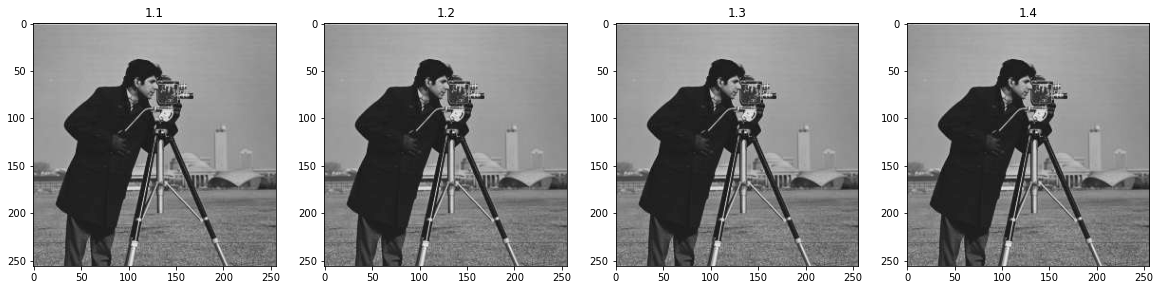

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1); plt.imshow(res1_1,'gray'), plt.title(1.1)
plt.subplot(1,4,2); plt.imshow(res1_2,'gray'), plt.title(1.2)
plt.subplot(1,4,3); plt.imshow(res1_3,'gray'), plt.title(1.3)
plt.subplot(1,4,4); plt.imshow(res1_4,'gray'), plt.title(1.4)

Plot ภาพที่มี Q2 ที่มี QF เเตกต่างกัน

(<matplotlib.image.AxesImage at 0x7fe7418f0040>, Text(0.5, 1.0, '2.4'))

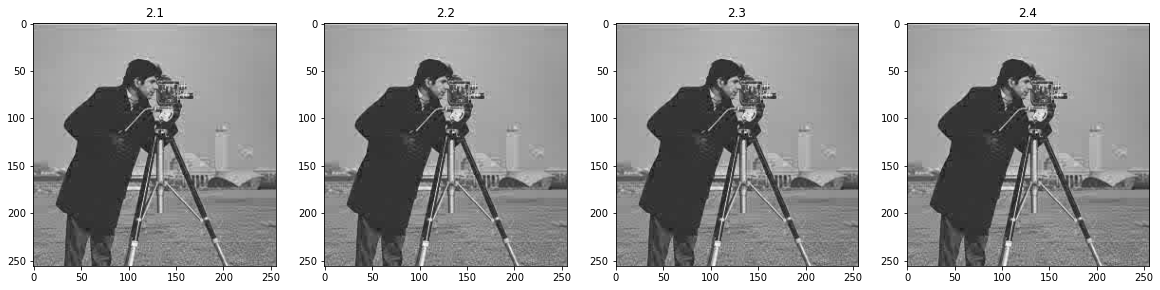

In [54]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1); plt.imshow(res2_1,'gray'), plt.title(2.1)
plt.subplot(1,4,2); plt.imshow(res2_2,'gray'), plt.title(2.2)
plt.subplot(1,4,3); plt.imshow(res2_3,'gray'), plt.title(2.3)
plt.subplot(1,4,4); plt.imshow(res2_4,'gray'), plt.title(2.4)

Plot ภาพที่มี Q3 ที่มี QF เเตกต่างกัน

(<matplotlib.image.AxesImage at 0x7fe762d143d0>, Text(0.5, 1.0, '3.4'))

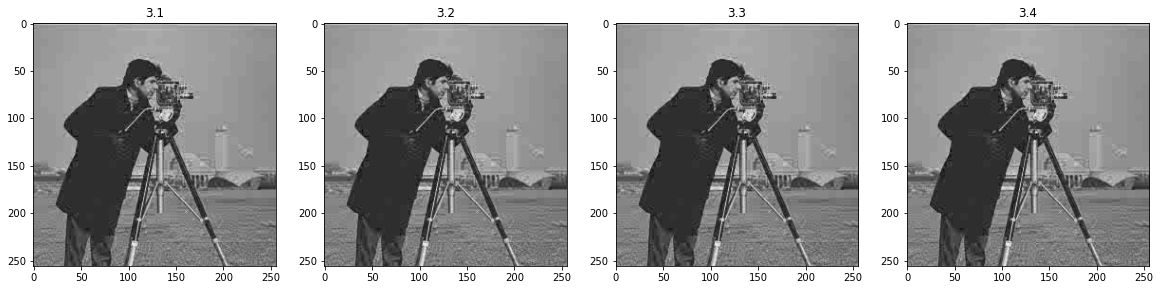

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(1,4,1); plt.imshow(res3_1,'gray'), plt.title(3.1)
plt.subplot(1,4,2); plt.imshow(res3_2,'gray'), plt.title(3.2)
plt.subplot(1,4,3); plt.imshow(res3_3,'gray'), plt.title(3.3)
plt.subplot(1,4,4); plt.imshow(res3_4,'gray'), plt.title(3.4)

Plot ภาพ original(Q1) กับ ผลลัพธ์
Show MSE,PSNR

                                         MSE value is 44.73493194580078 
                                         PSNR value is 31.624335798700635 dB


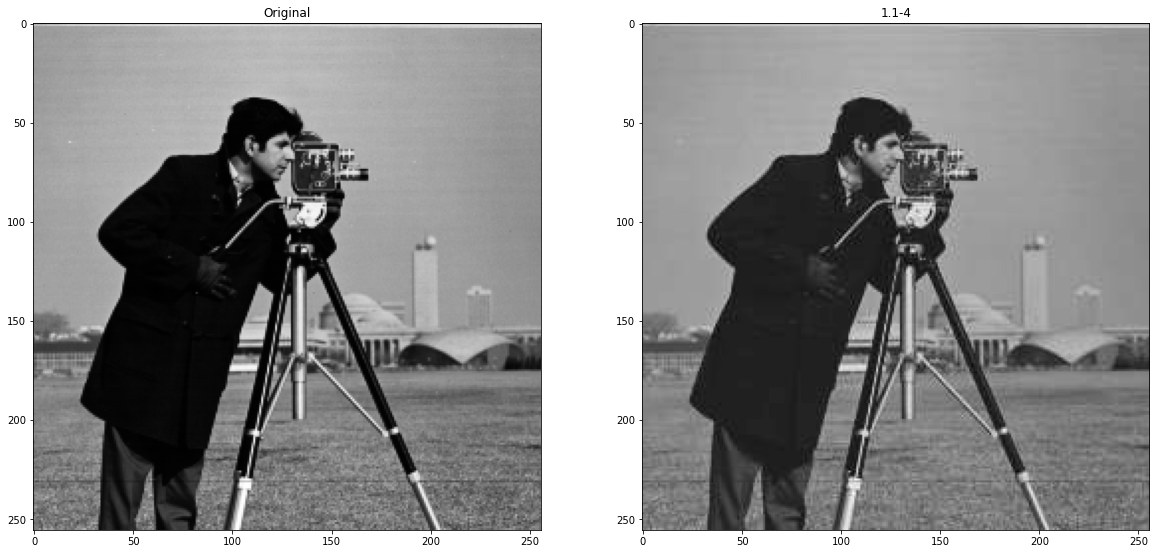

In [56]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def MSE(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  
        return 0
    return mse


def main():
     original = img
     compressed = res1_1
     value1 = MSE(original, compressed)
     value2 = PSNR(original, compressed)
     
     plt.figure(figsize=(20,20))
     plt.subplot(1,2,1); plt.imshow(img,'gray'), plt.title('Original')
     plt.subplot(1,2,2); plt.imshow(res1_1,'gray'), plt.title("1.1-4")
     print(f"                                         MSE value is {value1} ")
     print(f"                                         PSNR value is {value2} dB")
     
       
if __name__ == "__main__":
    main()
    



Plot ภาพ original(Q2) กับ ผลลัพธ์
Show MSE,PSNR

                                         MSE value is 92.5208969116211 
                                         PSNR value is 28.468405266322797 dB


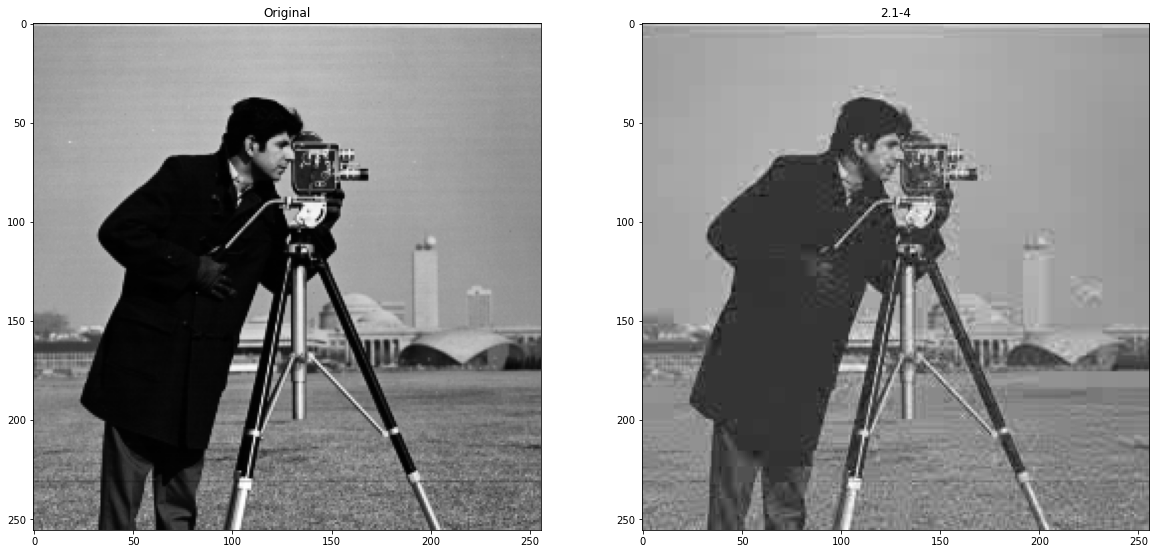

In [57]:
def main():
     original = img
     compressed = res2_1
     value1 = MSE(original, compressed)
     value2 = PSNR(original, compressed)
     
     plt.figure(figsize=(20,20))
     plt.subplot(1,2,1); plt.imshow(img,'gray'), plt.title('Original')
     plt.subplot(1,2,2); plt.imshow(res2_1,'gray'), plt.title("2.1-4")
     print(f"                                         MSE value is {value1} ")
     print(f"                                         PSNR value is {value2} dB")
     
       
if __name__ == "__main__":
    main()


Plot ภาพ original(Q3) กับ ผลลัพธ์
Show MSE,PSNR

                                         MSE value is 116.51622009277344 
                                         PSNR value is 27.466939736479294 dB


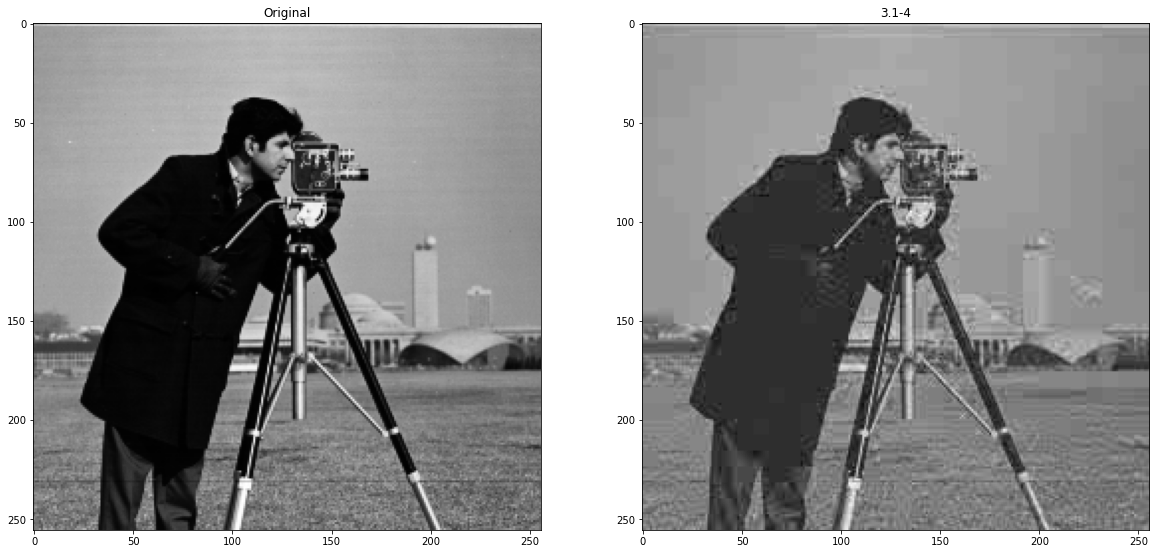

In [58]:
def main():
     original = img
     compressed = res3_1
     value1 = MSE(original, compressed)
     value2 = PSNR(original, compressed)
     
     plt.figure(figsize=(20,20))
     plt.subplot(1,2,1); plt.imshow(img,'gray'), plt.title('Original')
     plt.subplot(1,2,2); plt.imshow(res3_1,'gray'), plt.title("3.1-4")
     print(f"                                         MSE value is {value1} ")
     print(f"                                         PSNR value is {value2} dB")
     
       
if __name__ == "__main__":
    main()
    